# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# your code here
df = pd.read_csv('exch_rates.csv')

In [3]:
df.head()
df.Frequency = pd.to_datetime(df.Frequency)
df.set_index('Frequency', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


Plot the three exchange rates in one plot

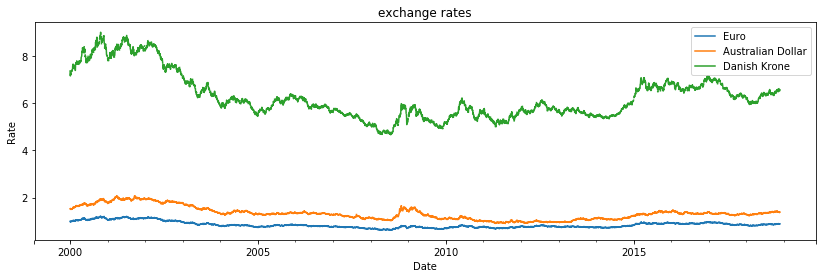

In [5]:
# your code here
df.plot(figsize=(14,4))
plt.title('exchange rates')
plt.xlabel('Date')
plt.ylabel('Rate');

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [6]:
# your code here
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

All of these are HIGHLY correlated. Even though they are on different time scales they all are experiencing similar fluctuations. I believe this is due to them all being in our gobal market and all being well established/weathy nations.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [7]:
# your code here
currency_diff = df.diff(periods=1)

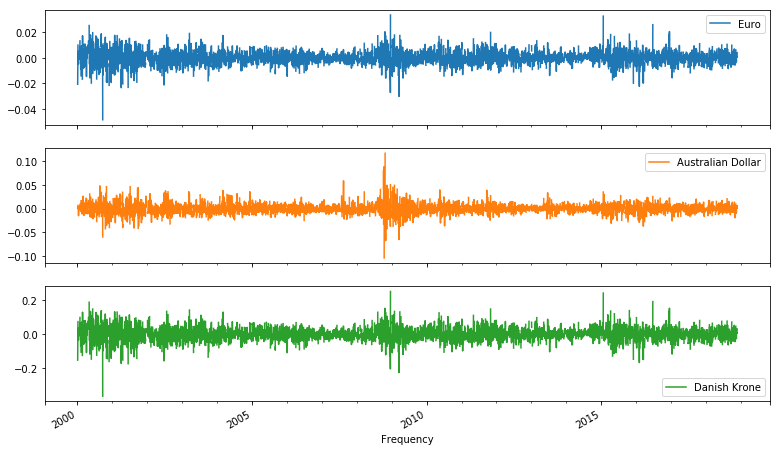

In [11]:
# your code here
currency_diff.plot(figsize=(13,8), subplots=True, legend=True);

In [9]:
# your code here
currency_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

When we differenced the series to get rid of  seasonailty we saw a big difference in the correclation between each currency. The Danish Krone became more correlated to the Euro, and the correlation between the two and the AUD decreased by A LOT. It makes sense that the Krone and the Euro are so similar due to them both being european and more closely related, and Denmark being apart of the same political structure.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [17]:
# your code here
euro = df[['Euro']]

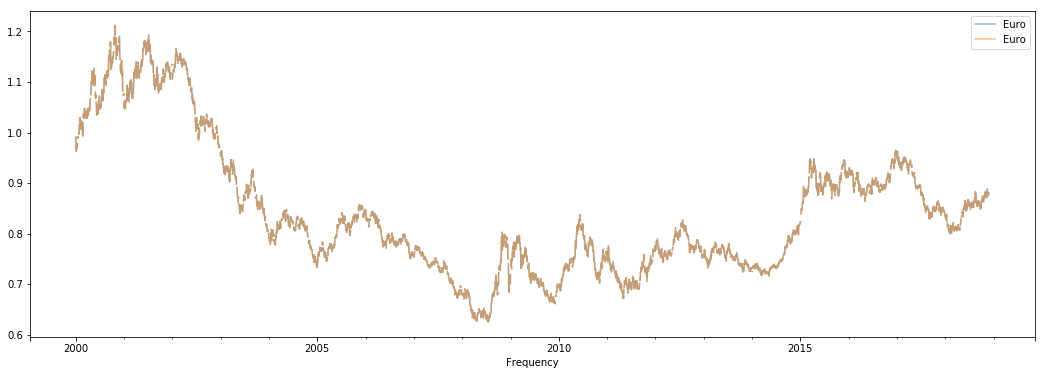

In [19]:
# your code here
euro_shift = euro.shift(periods=1)
lag_1= pd.concat([euro_shift, euro], axis=1)
lag_1.plot(figsize=(18,6), alpha=0.5);

In [20]:
# your code here
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

In [ ]:
# your code here
euro_shift_5 = euro.shift(periods=5)
lag_5= pd.concat([euro_shift_5, euro], axis=1)
lag_5.plot(figsize=(18,6), alpha=0.5);
# your code here
lag_5.corr()

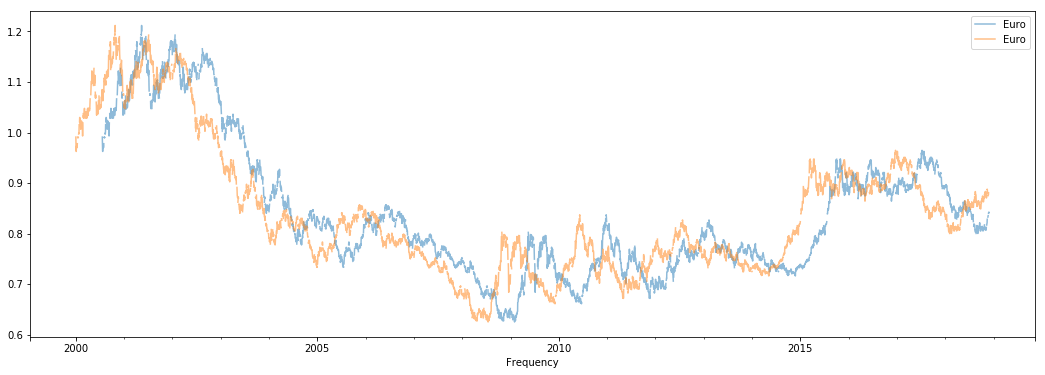

In [27]:
# your code here
euro_shift_200 = euro.shift(periods=200)
lag_200= pd.concat([euro_shift_200, euro], axis=1)
lag_200.plot(figsize=(18,6), alpha=0.5);

In [28]:
# your code here
lag_5.corr()

,Euro,Euro
Euro,1.000000,0.879688
Euro,0.879688,1.000000


### What's your conclusion here?

Knowing this, let's plot the ACF now.

In [ ]:
# your code here

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

In [ ]:
# your code here

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!